# PJM Hourly Energy Consumption Case

PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The hourly power consumption data comes from PJM's website and are in megawatts (MW).

### Exploratory Data Analysis Step - By Sabrina Otoni da Silva - 2024/04

In [50]:
from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [51]:
datapath = Path('../data/d02_intermediate')

In [52]:
df = pd.read_csv(f'{datapath}/pjme_n00.csv')
df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)

In [53]:
df.head()

,pjme_mw
datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0


In [54]:
df.tail()

,pjme_mw
datetime,
2018-08-02 20:00:00,44057.0
2018-08-02 21:00:00,43256.0
2018-08-02 22:00:00,41552.0
2018-08-02 23:00:00,38500.0
2018-08-03 00:00:00,35486.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-01-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   pjme_mw  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [56]:
df.describe()

,pjme_mw
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


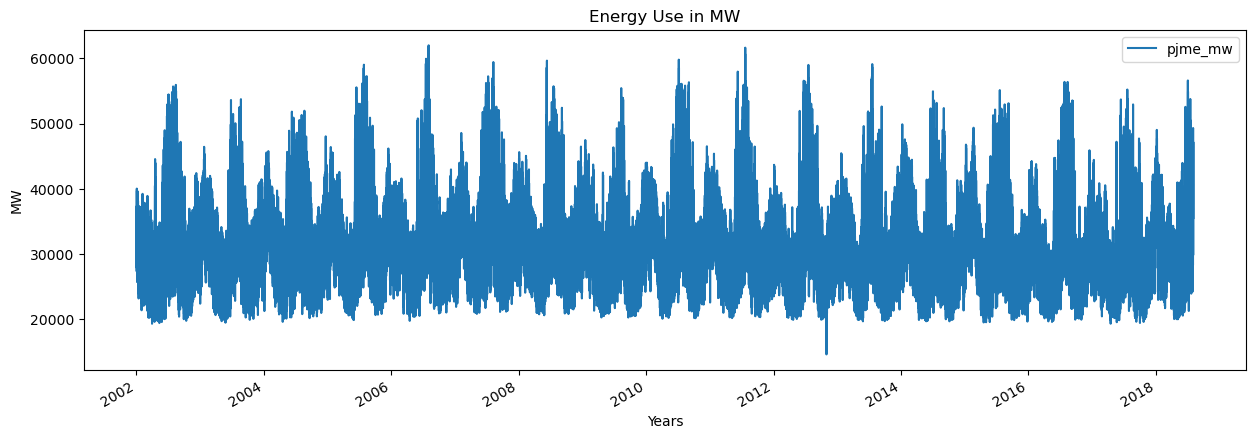

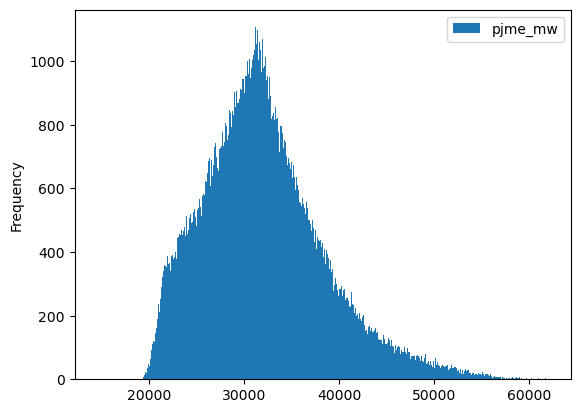

In [57]:
df.plot(figsize=(15, 5), title='Energy Use in MW')
plt.xlabel('Years')
plt.ylabel('MW')
plt.show()

df.plot(kind='hist', bins=500)
plt.show()

In [62]:
def test_stationarity(timeseries):
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print(dfoutput)

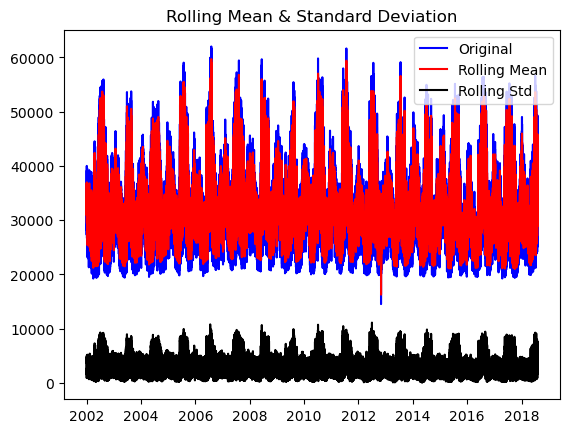

Results of Dickey-Fuller Test:
Test Statistic                    -19.881348
p-value                             0.000000
#Lags Used                         75.000000
Number of Observations Used    145290.000000
Critical Value (1%)                -3.430395
Critical Value (5%)                -2.861560
Critical Value (10%)               -2.566781
dtype: float64


In [64]:
test_stationarity(df['pjme_mw'])

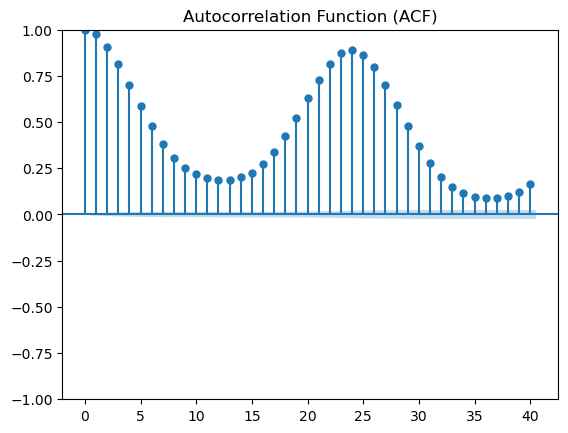

In [48]:
plot_acf(df, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

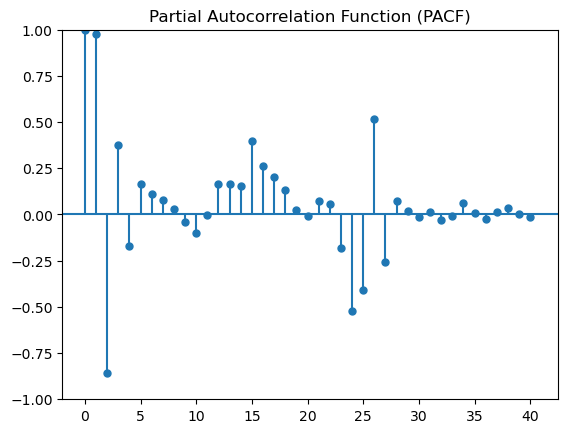

In [49]:
plot_pacf(df, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [33]:
df.loc[df['pjme_mw'] < 20000].count()

pjme_mw    188
dtype: int64

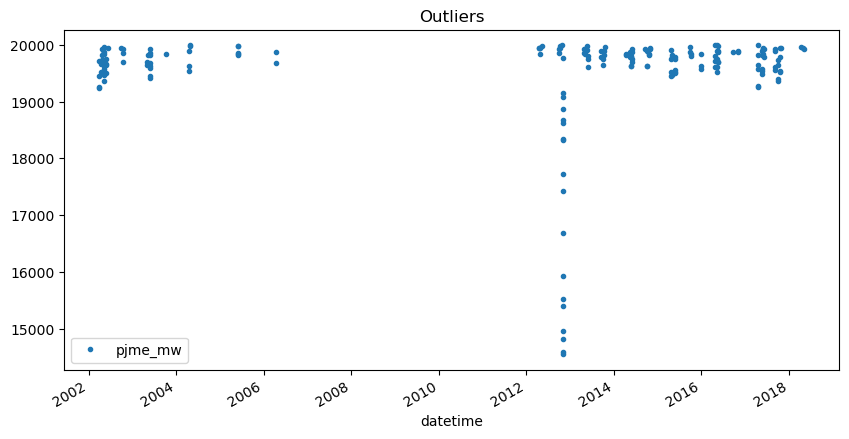

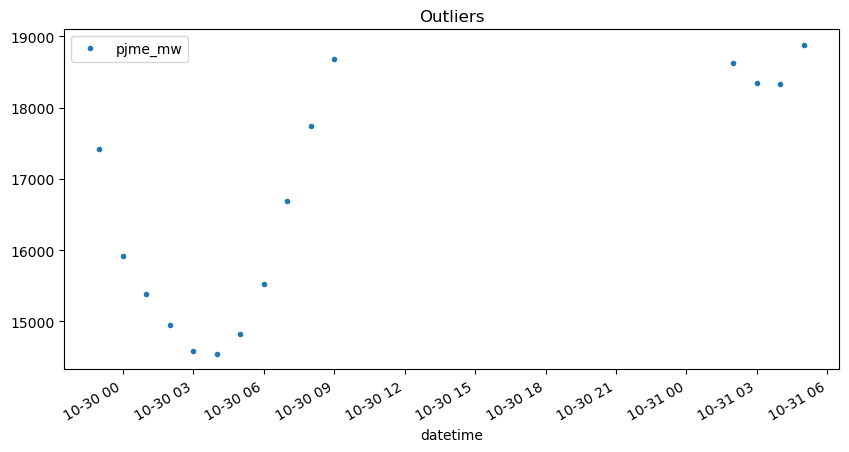

In [34]:
df.loc[df['pjme_mw'] < 20000].plot(style='.', figsize=(10, 5), title='Outliers');
df.loc[df['pjme_mw'] < 19000].plot(style='.', figsize=(10, 5), title='Outliers');

In [35]:
df = df.loc[df['pjme_mw'] > 19000].copy()

In [36]:
intermediate_path = Path('../data/d02_intermediate')
df.to_csv(f'{intermediate_path}/pjme_n01.csv')